# Plataformas Deep Learning

## Temario
- Introducción a Deep Learning
- Herramientas para Deep Learning
    - TensorFlow
    - Keras
- Perceptrón
- Redes Neuronales


## Log de instalación
- Anaconda 2019.10 for Windows Installer with Python 3.7 version, 64 bit graphical installer, [https://www.anaconda.com/distribution/#download-section](https://www.anaconda.com/distribution/#download-section)
<img src="images/anaconda-setup.png" alt="Anaconda Setup" title="Anaconda Setup"/>

    - Actualizar Anaconda por medio del siguiente comando en un prompt de Anaconda
    
    `conda update -n base -c defaults conda`
- NLTK
    - NLTK Data
 - TensorFlow
 - GitHub Desktop
 

# Base de conocimiento
## Anaconda
[Guía de inicio](https://conda.io/projects/conda/en/latest/user-guide/getting-started.html)

[Conda Cheat Sheet](https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf)

[Using Pip to install packages to Anaconda Environment](https://stackoverflow.com/questions/41060382/using-pip-to-install-packages-to-anaconda-environment)
## Jupyter
[Markdown for Jupyter cheat sheet](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)

## Ambiente Anaconda tf
### Crear el ambiente tf
Crear el ambiente desde un prompt de Anaconda:
`conda create -n tf tensorflow`
(tomar nota de la ubicación en el sistema de archivos del ambiente)

Activar el ambiente
`conda activate tf`

Desactivar el ambiente
`conda deactivate`

Ejecutar el intérprete de Python y verificar la versión
`python`
<img src="images/Python%20version.png" alt="Python version" title="Python version"/>

### Instalar paquetes de Python
Instalar los siguientes paquetes de Python por medio de un prompt de Anaconda y el comando conda install:

`conda install --name tf {package name}`
- matplotlib
- pandas
- seaborn

Para el caso de la librería cv2 referida en algunos ejemplos de código es necesario instalar opencv
`conda install -c conda-forge opencv`

### Instalar Spyder
Instalar Spyder desde Anaconda Navigator
<img src="images/Spyder%20en%20tf.png" alt="Spyder en tf" title="Spyder en tf"/>

### Recursos del ambiente tf

La ubicación del ambiente se reporta en la sección ## Package Plan ## generada por la salida de conda create, p.e.

` ## Package Plan ##`

`environment location: C:\Users\Marciano\.conda\envs\tf`




# TensorFlow
## Introducción
TensorFlow es una plataforma integral de Machine Learning de código abierto. Cuenta con un ecosistema amplio y flexible de herramientas, librerías y comunidad que permite a los investigadores avanzar el estado del arte en ML. Habilita a los desarrolladores para crear y desplegar fácilmente aplicaciones habilitadas con ML.

[tensorflow.org](https://tensorflow.org) es el sitio principal del proyecto.

## Componentes del marco de trabajo
TensorFlow tiene dos componentes:
- Librería: para definir grafos computacionales.
- Tiempo de ejecución: para ejecutar grafos en una diversas plataformas de hardware.

[Arquitectura de TensorFlow](https://github.com/tensorflow/docs/blob/master/site/en/r1/guide/extend/architecture.md)

### Grafos computacionales
Los grafos computacionales son la representación de algoritmos de Machine Learning en TensorFlow, son un tipo de grafo dirigido en donde los nodos describen operaciones y los enlaces representan los datos (tensores) que fluyen entre las operaciones.

Los grafos constan de:
- Tensores: Descripción de un arreglo multidimensional. Tienen cardinalidad y un tipo de dato, pero no valores.
- Operaciones: Tienen cero o más entradas y producen cero o más salidas. Pueden representar ecuaciones matemáticas, variables, constantes o directivas de control de flujo.
- Variables: Todos los parámetros sujetos a entrenamiento de Machine Learning son _tf.Variables_. Una variable se define por su nombre, tipo, forma y procedimiento de inicialización. 

### Ventajas de los grafos computacionales
- Calendarización conducida por dependencias. Las dependencias de datos dictan el orden de ejecución. Las operaciones que no dependen entre sí pueden calendarizarse para ejecución en paralelo.
- Optimización de grafos. Tales como eliminación de grafos comunes.
- Diferenciación automática. Facilita el cálculo de gradientes. Cuando se conocen los gradientes de la salida de cada operación con respecto a sus entradas directas, la regla de la cadena nos provee de gradientes para cualquier tensor con respecto a cualquier otro. Este proceso se conoce como autodiferenciación en modo inverso, y habilita el cómputo del gradiente de un nodo en el grafo con respecto a todos los demás en una sola pasada.

## Tensores
El cómputo en TensorFlow se expresa como un grafo de flujo de datos con estado. El nombre TensorFlow driva de las operaciones que las redes neuronales emplean en arreglos de datos multidimensionales, que se refieren como tensores.

## Versiones de TensorFlow
- 1.0.0 liberada en febrero de 2017
- 2.0.0 disponible en septiembre de 2019



# TensorFlow 1.0

In [1]:
#TF default
#Hello TensorFlow 1.0
import tensorflow as tf

msg = tf.constant('Hello TensorFlow 1.0')
sess = tf.Session()
print(sess.run(msg))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [2]:
#Corriendo código de TensorFlow 1.0 en ambiente TensorFlow 2.0
#Hello TensorFlow 1.0 code from TensorFlow 2.0 environment 
#Código de TensorFlow 1.0 en ambiente TensorFlow 2.0 con modo de compatibilidad v1
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

msg = tf1.constant('Hello TensorFlow 1.0 with compatibility')
sess = tf1.Session()
print(sess.run(msg))

Instructions for updating:
non-resource variables are not supported in the long term
b'Hello TensorFlow 1.0 with compatibility'


## Uso de grafos computacionales en TensorFlow 1.0
Las funciones de la librería de TensorFlow permiten definir el grafo de cómputo con el objeto _tf.Graph_.

El entorno de ejecución procesa el cómputo especificado en el grafo por medio del objeto _tf.Session_.

_Eager execution_ es soportada en TensorFlow 1.0 por medio de la función de configuración

`import tensorflow as tf
tf.enable_eager_execution()`

Sin especificación explícita, todas las operaciones (nodos) se añaden a la instancia global _tf.Graph_.

Los grafos son estables y eficientes en desempeño, sin embargo su naturaleza no imperativa imponen una carga adicional en los desarrolladores.

In [2]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

a = tf1.constant(1.0)
b = tf1.constant(2.0)
c = tf1.add(a,b) #la operación añade un nodo al la instancia global tf.Graph
with tf1.Session()as sess:
    print(sess.run(c))

3.0


Para el caso de TensorFlow 1.0 se recomienda el uso explícito de _tf.Graph_ tal como se muestra a continuación:

In [6]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

g1 = tf1.Graph()

with g1.as_default() as g:
    a = tf1.constant(1.0)
    b = tf1.constant(1.0)
    c = tf1.add(a,b)

with tf1.Session(graph = g1) as sess:
    print(sess.run(c))

2.0


El siguiente código ilustra el comportamiento de TensorFlow 1.0 por omisión, es decir sin la activación de _eager execution_

In [2]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

a = tf1.constant([[1,2],[3,4]])
print(a)

Tensor("Const:0", shape=(2, 2), dtype=int32)


## Práctica: tf.Session
Encapsula el código de arriba en un objeto tf.Session() para que pueda visualizarse el valor de a.

## Inyección de datos con _placeholder_
Los _placeholders_ nos permiten ingresar datos en el grafo en tiempo de ejecución. 

In [2]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

a = tf1.placeholder(tf1.float32, [])
b = tf1.constant(1.0)
c = tf1.add(a,b)

with tf1.Session() as session:
    print(session.run(c, feed_dict={a:1.0}))
    print(session.run(c, feed_dict={a:2.0}))

2.0
3.0


Los placeholders pueden emplearse para inyectar datos en el grafo en tiempo de ejecución. Los placeholders se usan en el grafo como tensores pero en cada ejecución del grafo tomarán los valores que se especifiquen en el diccionario feed_dic provisto a _session.run_.

## Control de dependencias en TensorFlow 1.0
Los desarrolladores familiarizados con Python encuentran diferencias en el paradigma computacional de TensorFlow 1.0 debido a que en él se requiere del objeto _tf.Session_ para la ejecución del grafo computacional, la declaración explícita de dependencias de variables y la falta de estatutos de control como `if`, `while` y `for`.

Considerando el siguiente bloque de código, ¿cuál es el valor esperado del estatuto print: 11 o 3?

In [1]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

a = tf1.constant(1.0)
b = tf1.Variable(2.0)
assign_b = tf1.assign(b,10)
c = tf1.add(a,b)
with tf1.Session() as sess:
    sess.run(tf1.global_variables_initializer())
    print(sess.run(c))

Instructions for updating:
non-resource variables are not supported in the long term
3.0


El valor no fue 11 debido a que hubo una dependencia implícita entre las operaciones __b__ y __assign_b__.

Para declarar dependencias explícitas es necesario reescribir el código como sigue:

In [3]:
#TF 1.0
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

a = tf1.constant(1.0)
b = tf1.Variable(2.0)
assign_b = tf1.assign(b,10)
with tf1.control_dependencies([assign_b]):
    c = tf1.add(b,c)
    
with tf1.Session() as sess:
    sess.run(tf1.global_variables_initializer())
    print(sess.run(c))

23.0


## Actualización de código de TensorFlow 1.0 a 2.0
El artículo [Migrate your TensorFlow 1 code to TensorFlow 1](https://www.tensorflow.org/guide/migrate) describe las siguientes estrategias:
- Importar tensorflow en modo de compatibilidad con 1.0
    - Implica no tomar ventaja de las diversas mejoras en TensorFlow 2.0
- Ejecutar el script de actualización TF1.0 a TF2.0
- Actualizar el código manualmente de acuerdo con los lineamientos del documento, que permiten contar con código más simple, con mejor desempeño y más fácil de mantener

### Script de actualización de TensorFlow 1.0 a TensorFlow 2.0
[Enlace a la documentación del script](https://www.tensorflow.org/guide/upgrade)

El script se instala por default con TensorFlow 2.0 en la siguiente ruta: `[TF_ENVIRONMENT_PATH]\Lib\site-packages\tensorflow_core\tools\compatibility`

tf_upgrade_v2_main.py es el punto de entrada del script, su documentación se accede por medio de `python tf_upgrade_v2_main.py -h` 


# TensorFlow 2.0
TensorFlow 2.0 representa una evolución de una librería de software para deep learning a un ecosistema para todo tipo de machine learning.

Enfocado en simplicidad, facilidad de uso y nuevas capacidades:
- Construcción sencilla de modelos por medio de Keras y _eager execution_.
- Despliegue robusto de modelos en producción en cualquier plataforma.
- Poderosa experimentación para investigadores.
- APIs simplificadas al eliminar APIs deprecadas y reducir duplicidad.

En TensorFlow 2.0 se han empaquetado diversos componentes desarrollados durante el ciclo de vida de TensorFlow 1.0 para proveer de una plataforma que soporte flujos de Machine Learning desde entrenamiento hasta despliegue.
<img src="images/tf2-architecture.png" alt="TensorFlow 2.0 Architecture" title="TensorFlow 2.0 Architecture"/>
Tensorflow.js soporta modelos de entrenamiento, enlaces con otros lenguajes con diversos niveles de soporte incluyendo Swift, R y Julia.
## Desarrollo fácil de modelos
En TensorFlow 2.0 Keras, un API estándar de machine learning amigable para los usuarios, será el API central de alto nivel para desarrollar y entrenar modelos. El API de Keras facilita iniciar con TensorFlow. Keras provee de diversos APIs de construcción de modelos (Sequential, Functional y Subclassing), que permiten elegir en nivel adecuado de abstracción para cada proyeto. La implementación de TensorFlow incluye mejoras tales como _eager execution_ para iteración inmediata, depuración intuitiva y tf.data para construir ductos de entrada de datos escalables.

Flujo de referencia:
1. Cargar datos por medio de tf.data. Los datos de entrenamiento se leen empleando ductos de entrada que son creados empleando `tf.data`. Las características de los features, por ejemplo bucketing y feature crosses se describen empleando `tf.feature_column`. También se soporta la carga de datos que estén en memoria (por ejemplo NumPy).
2. Construir, entrenar y validar el modelo con tf.keras o emplear Premade Estimators. Keras se integra fuertemente con el resto de TensorFlow, por lo que es es posible acceder a las características de TensorFlow cuando sea requerido. Se cuenta con un conjunto de modelos estándar empaquetados (por ejemplo regresión lineal y logística, gradient boosted trees, árboles aleatorios) para emplearse directamente (implementados con el API `tf.estimator`). TensorFlow Hub provee de módulos para entrenar un modelo Keras o Estimator para quienes no estén buscando entrenar un modelo desde cero.
3. Ejecutar y depurar con _eager execution_ y posteriormente emplear tf.function para contar con los beneficios de los grafos. TensorFlow 2.0 corre con con _eager execution_ por default para facilidad de uso y depuración. La anotación `tf_function` traduce de forma transparente los programas de Python a grafos de TensorFlow. Este proceso retiene todas las ventajas de la ejecución basada en grafos de TensorFlow: optimizaciones de desempeño, ejecución remota y la capacidad de serializar, exportar y desplegar fácilmente, añadiendo la flexibilidad y facilidad de uso de expresar programas en Python.
4. Entrenamiento distribuido por medio de Distribution Strategies. Para tareas de entrenamiento de machine learning grandes, el API Distribution Strategy facilita distribuir y entrenar modelos en diversas configuraciones de hardware sin cambiar las definiciones del modelo. Debido a que TensorFlow provee soporte para un rango de aceleradores de hardware com CPUs, GPUs y TPUs, es posible habilitar tareas de entrenamiento para ser distribuidas en un solo nodo con multi aceleradores así como múltiples nodos con multi aceleradores, incluyendo TPU pods. A pesar que este API soporta una variedad de configuraciones de cluster, se proveen de plantillas para desplegar entrenamiento en clusters de Kubernetes en ambientes on premise o en la nube.
5. Exportar a SavedModel. TensorFlow estandariza en SavedModel como un formato de intercambio para TensorFlow Serving, TensorFlow Lite, TensorFlow.js TensorFlow Hub y más.





## Eager Execution
En TensorFlow 2.0 _eager execution_ se encuentra habilitada por omisión. Se trata de una plataforma de machine learning flexible para investigación y experimentación que provee:

Una interfaz intuitiva - El código se estructura de forma natural y emplea estructuras de datos de Python.

Facilita la depuración - Permite invocar operaciones directamente para inspeccionar modelos en ejecución y probar cambios.

Control de flujo natural - Es posible emplear estatutos de control de flujo de Python en vez de flujo de control de grafos.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Model:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
model(20)



<tf.Tensor: id=19, shape=(), dtype=float32, numpy=330.0>

In [9]:
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercept

NUM_EXAMPLES = 1000

X = tf.random.normal(shape=(NUM_EXAMPLES,))
noise = tf.random.normal(shape=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

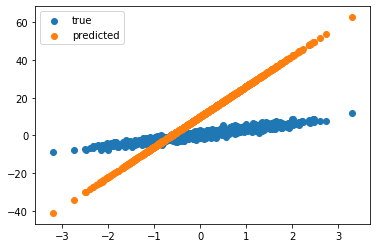

In [10]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

In [11]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [12]:
def train(model, X, y, lr=0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, model(X))

    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(lr * dW)
    model.b.assign_sub(lr * db)

Epoch 0: Loss: 264.9639587402344
Epoch 1: Loss: 168.31654357910156
Epoch 2: Loss: 107.0546875
Epoch 3: Loss: 68.22273254394531
Epoch 4: Loss: 43.608375549316406
Epoch 5: Loss: 28.0061092376709
Epoch 6: Loss: 18.116317749023438
Epoch 7: Loss: 11.847485542297363
Epoch 8: Loss: 7.873863697052002
Epoch 9: Loss: 5.355105400085449
Epoch 10: Loss: 3.7585439682006836
Epoch 11: Loss: 2.746530771255493
Epoch 12: Loss: 2.1050469875335693
Epoch 13: Loss: 1.6984292268753052
Epoch 14: Loss: 1.4406861066818237
Epoch 15: Loss: 1.2773113250732422
Epoch 16: Loss: 1.1737521886825562
Epoch 17: Loss: 1.1081093549728394
Epoch 18: Loss: 1.066500186920166
Epoch 19: Loss: 1.0401252508163452


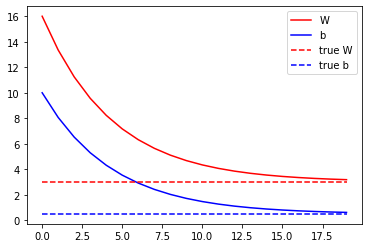

In [13]:
model = Model()
Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    Ws.append(model.W.numpy()) # eager execution allows us to do this
    bs.append(model.b.numpy())

    current_loss = loss(y, model(X))

    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

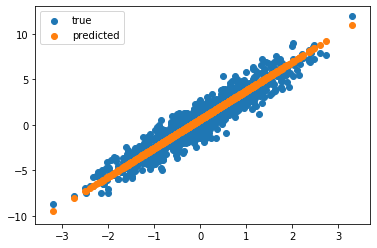

In [14]:
plt.scatter(X, y, label="true")
plt.scatter(X, model(X), label="predicted")
plt.legend()

## AutoGraph
AutoGraph integra la facilidad de _eager execution_ con el poder de los grafos de TensorFlow. Se trata de un mini compilador que tansforma un suconjunto de estatutos de Python en grafos TensorFlow portables de alto desempeño. AutoGraph se implementa por medio del decorador __tf.function__.

Guía de [tf.function](https://tensorflow.org/guide/function)


In [12]:
@tf.function
def simple_nn_layer(x,y):
    return tf.nn.relu(tf.matmul(x,y))

Para verificar el código transformado se emplea la siguente función:
`tf.autograph_to_code([FUNCTION].python_function)`

In [14]:
print(tf.autograph.to_code(simple_nn_layer.python_function))

def tf__simple_nn_layer(x, y):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('simple_nn_layer', 'simple_nn_layer_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as simple_nn_layer_scope:
    do_return = True
    retval_ = simple_nn_layer_scope.mark_return_value(ag__.converted_call(tf.nn.relu, simple_nn_layer_scope.callopts, (ag__.converted_call(tf.matmul, simple_nn_layer_scope.callopts, (x, y), None, simple_nn_layer_scope),), None, simple_nn_layer_scope))
  do_return,
  return ag__.retval(retval_)



## tf.data
## tf.keras
## tf.function

In [1]:
#TF 2.0
#Hello TensorFlow 2.0
import tensorflow as tf
msg2 = tf.constant('Hello TensorFlow 2.0')
tf.print(msg2)

Hello TensorFlow 2.0


# Keras
## Introducción
Keras es un API de alto nivel para redes neuronales, escrita en Python que es capaz de correr sobre TensorFlow, CNTK o Theano. Fue desarrollada con énfasis en habilitar experimentación rápida. Es recomendable el uso de Keras cuando se requiere de una libería de Deep Learning que:
- Permita el desarrollo de prototipos fácil y rápido (por medio de facilidad de uso, modularidad y extensibilidad).
- Soporte redes neuronales convolucionales (CNN) y redes neuronales recurrentes (RNN), así como combinaciones de ambas.
- Corra de forma natural en CPUs y GPUs.

[keras.io](https://keras.io) es el sitio principal del proyecto.
Notas adicionales.
